# Data Science Job Salaries

## An overview of dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv ('salaries.csv')
print(df)

      work_year experience_level employment_type                 job_title  \
0          2023               MI              FT        Research Scientist   
1          2023               SE              FT            Data Scientist   
2          2023               EX              FT            Data Scientist   
3          2023               EX              FT            Data Scientist   
4          2023               MI              FT             Data Engineer   
...         ...              ...             ...                       ...   
4483       2020               SE              FT            Data Scientist   
4484       2021               MI              FT  Principal Data Scientist   
4485       2020               EN              FT            Data Scientist   
4486       2020               EN              CT     Business Data Analyst   
4487       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

In [4]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Research Scientist,280000,USD,280000,GB,50,GB,L
1,2023,SE,FT,Data Scientist,800000,NOK,77627,NO,50,NO,S
2,2023,EX,FT,Data Scientist,250000,USD,250000,US,100,US,M
3,2023,EX,FT,Data Scientist,180000,USD,180000,US,100,US,M
4,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
5,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
6,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
7,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
8,2023,SE,FT,Data Scientist,240000,USD,240000,US,100,US,M
9,2023,SE,FT,Data Scientist,157000,USD,157000,US,100,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4488 entries, 0 to 4487
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4488 non-null   int64 
 1   experience_level    4488 non-null   object
 2   employment_type     4488 non-null   object
 3   job_title           4488 non-null   object
 4   salary              4488 non-null   int64 
 5   salary_currency     4488 non-null   object
 6   salary_in_usd       4488 non-null   int64 
 7   employee_residence  4488 non-null   object
 8   remote_ratio        4488 non-null   int64 
 9   company_location    4488 non-null   object
 10  company_size        4488 non-null   object
dtypes: int64(4), object(7)
memory usage: 385.8+ KB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,4488.000000,4.488000e+03,4488.000000,4488.000000
mean,2022.475713,1.891214e+05,141121.108066,45.532531
std,0.674168,6.243121e+05,63629.987204,48.679755
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,100000.000000,0.000000
50%,2023.000000,1.400000e+05,138475.000000,0.000000
75%,2023.000000,1.846175e+05,180000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## Discover job titles

In [7]:
df['job_title'].count

<bound method Series.count of 0             Research Scientist
1                 Data Scientist
2                 Data Scientist
3                 Data Scientist
4                  Data Engineer
                  ...           
4483              Data Scientist
4484    Principal Data Scientist
4485              Data Scientist
4486       Business Data Analyst
4487        Data Science Manager
Name: job_title, Length: 4488, dtype: object>

We use nunique() function to find number of unique job titles

In [8]:
df['job_title'].nunique()   # df['job_title'].unique().size

100

We use unique() method to show all job titles

In [9]:
df['job_title'].unique()


array(['Research Scientist', 'Data Scientist', 'Data Engineer',
       'Applied Scientist', 'Machine Learning Engineer', 'Data Analyst',
       'Machine Learning Infrastructure Engineer',
       'Business Intelligence Engineer', 'Decision Scientist',
       'Data Specialist', 'Analytics Engineer', 'Data Architect',
       'Data Manager', 'Sales Data Analyst', 'BI Data Analyst',
       'Data Operations Specialist', 'Director of Data Science',
       'Machine Learning Scientist', 'Business Intelligence Data Analyst',
       'Insight Analyst', 'Business Intelligence Developer',
       'ETL Developer', 'ML Engineer', 'NLP Engineer',
       'Data Science Manager', 'Head of Data', 'Computer Vision Engineer',
       'Applied Machine Learning Engineer', 'Business Data Analyst',
       'Data Operations Engineer', 'Staff Data Analyst',
       'Applied Machine Learning Scientist', 'AWS Data Architect',
       'Product Data Analyst', 'Machine Learning Developer',
       'Research Engineer', 'Data 

## Task 1: Top 10 most popular job titles

### Create a table of job title frequency and visualise in a piechart

Using value_counts(), we can display number of each job titles

In [10]:
df['job_title'].value_counts()

Data Engineer                1202
Data Scientist                994
Data Analyst                  711
Machine Learning Engineer     363
Analytics Engineer            126
                             ... 
Data DevOps Engineer            1
BI Data Engineer                1
Marketing Data Engineer         1
Azure Data Engineer             1
Staff Data Scientist            1
Name: job_title, Length: 100, dtype: int64

In [11]:
# create pandas series
freq_count = df['job_title'].value_counts()
# create the DataFrame
df_freq_title = pd.DataFrame({'Job Title': freq_count.index, 'Count': freq_count.values})
print(df_freq_title)
isinstance(df_freq_title, pd.DataFrame)

                    Job Title  Count
0               Data Engineer   1202
1              Data Scientist    994
2                Data Analyst    711
3   Machine Learning Engineer    363
4          Analytics Engineer    126
..                        ...    ...
95       Data DevOps Engineer      1
96           BI Data Engineer      1
97    Marketing Data Engineer      1
98        Azure Data Engineer      1
99       Staff Data Scientist      1

[100 rows x 2 columns]


True

In [12]:
# create pandas series
freq_count = df['job_title'].value_counts()
# create the DataFrame
df_freq_title = pd.DataFrame({'Job Title': freq_count.index, 'Count': freq_count.values})
print(df_freq_title)
isinstance(df_freq_title, pd.DataFrame)

                    Job Title  Count
0               Data Engineer   1202
1              Data Scientist    994
2                Data Analyst    711
3   Machine Learning Engineer    363
4          Analytics Engineer    126
..                        ...    ...
95       Data DevOps Engineer      1
96           BI Data Engineer      1
97    Marketing Data Engineer      1
98        Azure Data Engineer      1
99       Staff Data Scientist      1

[100 rows x 2 columns]


True

Text(0.5, 1.0, 'Distribution of job titles')

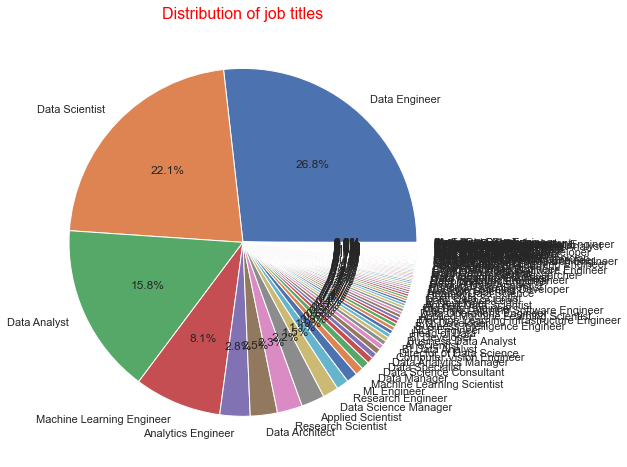

In [20]:
plt.figure(figsize=(12, 8))
plt.pie(df_freq_title['Count'], labels=df_freq_title['Job Title'], autopct='%1.1f%%')
sns.set()
plt.title("Distribution of job titles", fontsize=16, color='red')


In [23]:
df_freq_title.to_csv('job_title_frequency.csv', index=False)

### Create a table of job title frequency of top 10 popular and visualise in a piechart and barchart

In [14]:
# create pandas series
top_freq_count = df['job_title'].value_counts()[:10]
# create the DataFrame
df_top_freq_title = pd.DataFrame({'Job Title': top_freq_count.index, 'Count': top_freq_count.values})
print(df_top_freq_title)
isinstance(df_top_freq_title, pd.DataFrame)

                   Job Title  Count
0              Data Engineer   1202
1             Data Scientist    994
2               Data Analyst    711
3  Machine Learning Engineer    363
4         Analytics Engineer    126
5             Data Architect    113
6         Research Scientist    105
7          Applied Scientist     97
8       Data Science Manager     66
9          Research Engineer     51


True

Text(0.5, 1.0, 'Distribution of top 10 popular job titles')

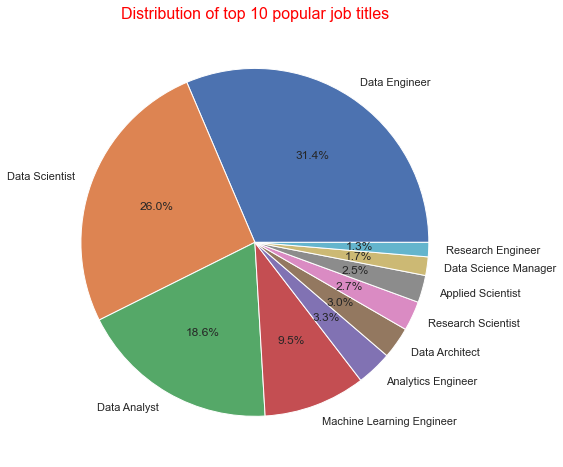

In [19]:
plt.figure(figsize=(12, 8))
plt.pie(df_top_freq_title['Count'], labels=df_top_freq_title['Job Title'], autopct='%1.1f%%')
sns.set()
plt.title("Distribution of top 10 popular job titles", fontsize=16, color='red')


Text(0.5, 1.0, 'Top 10 popular job titles')

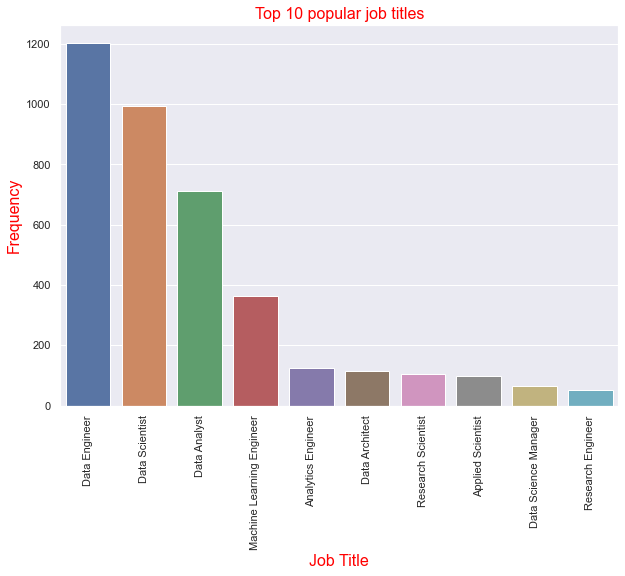

In [22]:
plt.figure(figsize=(10, 7))  
sns.barplot(data=df_top_freq_title, x="Job Title", y="Count")
plt.xticks(rotation=90)  
plt.xlabel("Job Title", fontsize=16, color='red') 
plt.ylabel("Frequency", fontsize=16, color='red')  
plt.title("Top 10 popular job titles", fontsize=16, color='red')  

In [13]:
df_top_freq_title.to_csv('popular_job_title.csv', index=False)

## Task 2: Top 10 highest paid in average

### Visualise 10 jobs of highest paid in average

In [14]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Research Scientist,280000,USD,280000,GB,50,GB,L
1,2023,SE,FT,Data Scientist,800000,NOK,77627,NO,50,NO,S
2,2023,EX,FT,Data Scientist,250000,USD,250000,US,100,US,M
3,2023,EX,FT,Data Scientist,180000,USD,180000,US,100,US,M
4,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
4483,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
4484,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
4485,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
4486,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [15]:
groupby_title = df[['job_title', 'salary_in_usd']].groupby('job_title')
for group_name, group_data in groupby_title:
    print(f"Job Title: {group_name}")
    print(group_data)

Job Title: AI Developer
         job_title  salary_in_usd
956   AI Developer          75029
971   AI Developer         200000
1060  AI Developer         275000
1230  AI Developer         108000
1231  AI Developer          60000
1474  AI Developer          80000
1573  AI Developer         215636
1722  AI Developer          64691
2265  AI Developer         120000
2285  AI Developer           6304
Job Title: AI Programmer
          job_title  salary_in_usd
1473  AI Programmer          70000
2587  AI Programmer          40000
Job Title: AI Scientist
         job_title  salary_in_usd
637   AI Scientist         120000
1265  AI Scientist         421328
1807  AI Scientist          38814
1855  AI Scientist          30000
2684  AI Scientist         125000
2769  AI Scientist         200000
3455  AI Scientist          50000
3523  AI Scientist          31520
3650  AI Scientist         200000
3860  AI Scientist         200000
3889  AI Scientist         200000
3892  AI Scientist         120000
4270  

In [16]:
groupby_title.mean()

,salary_in_usd
job_title,
AI Developer,120466.000000
AI Programmer,55000.000000
AI Scientist,110565.352941
AWS Data Architect,258000.000000
Analytics Engineer,155471.698413
...,...
Research Scientist,167327.180952
Sales Data Analyst,35000.000000
Software Data Engineer,62514.500000


In [17]:
top_average = groupby_title.mean()[:10].sort_values('salary_in_usd', ascending=False)
top_average

,salary_in_usd
job_title,
AWS Data Architect,258000.000000
Applied Scientist,187502.474227
Analytics Engineer,155471.698413
AI Developer,120466.000000
Applied Data Scientist,113696.600000
AI Scientist,110565.352941
Applied Machine Learning Engineer,108703.750000
Applied Machine Learning Scientist,104792.923077
Autonomous Vehicle Technician,57518.333333


In [18]:
isinstance(top_average, pd.DataFrame)

True

In [19]:
top_average = top_average.reset_index()

In [20]:
top_average = top_average.rename(columns={'job_title': 'Job Title', 'salary_in_usd': 'Salary'})
top_average

,Job Title,Salary
0,AWS Data Architect,258000.000000
1,Applied Scientist,187502.474227
2,Analytics Engineer,155471.698413
3,AI Developer,120466.000000
4,Applied Data Scientist,113696.600000
5,AI Scientist,110565.352941
6,Applied Machine Learning Engineer,108703.750000
7,Applied Machine Learning Scientist,104792.923077
8,Autonomous Vehicle Technician,57518.333333
9,AI Programmer,55000.000000


Text(0.5, 1.0, "['Average Salary by Job Title']")

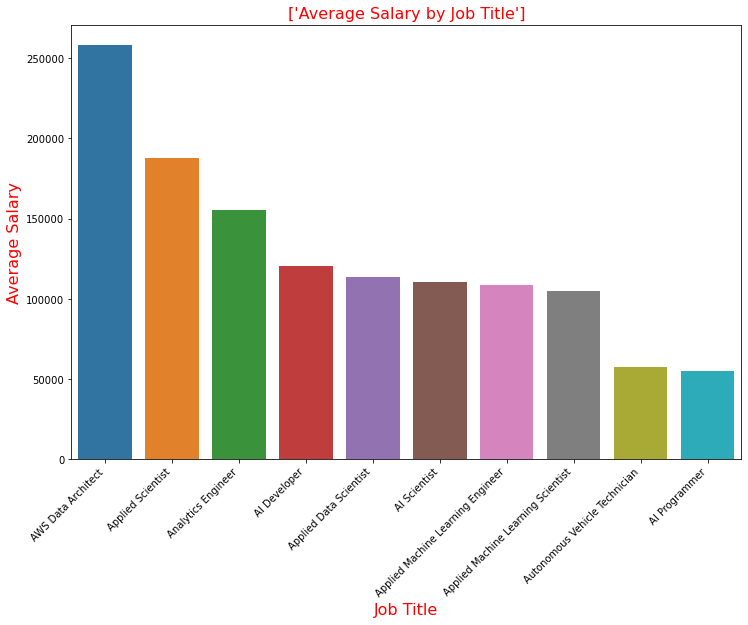

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_average, x="Job Title", y="Salary")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Job Title", fontsize=16, color='red')  
plt.ylabel("Average Salary", fontsize=16, color='red')
plt.title("Average Salary by Job Title", fontsize=16, color="red")

In [22]:
top_average.to_csv("top_highest_paid_in_average.csv", index=False)

## Task 3: Average salary of levels of jobs with more than 100 posts

In [23]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Research Scientist,280000,USD,280000,GB,50,GB,L
1,2023,SE,FT,Data Scientist,800000,NOK,77627,NO,50,NO,S
2,2023,EX,FT,Data Scientist,250000,USD,250000,US,100,US,M
3,2023,EX,FT,Data Scientist,180000,USD,180000,US,100,US,M
4,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
4483,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
4484,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
4485,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
4486,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [24]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

We recall top 10 popular job titles

In [25]:
df_freq_title

,Job Title,Count
0,Data Engineer,1202
1,Data Scientist,994
2,Data Analyst,711
3,Machine Learning Engineer,363
4,Analytics Engineer,126
5,Data Architect,113
6,Research Scientist,105
7,Applied Scientist,97
8,Data Science Manager,66
9,Research Engineer,51


In [26]:
counts = df.value_counts('job_title')
freq_count = counts[counts >= 100]
freq_count

job_title
Data Engineer                1202
Data Scientist                994
Data Analyst                  711
Machine Learning Engineer     363
Analytics Engineer            126
Data Architect                113
Research Scientist            105
dtype: int64

In [27]:
freq_count.keys

<bound method Series.keys of job_title
Data Engineer                1202
Data Scientist                994
Data Analyst                  711
Machine Learning Engineer     363
Analytics Engineer            126
Data Architect                113
Research Scientist            105
dtype: int64>

In [28]:
freq_count.values

array([1202,  994,  711,  363,  126,  113,  105], dtype=int64)

In [29]:
job_title_list = freq_count.index.tolist()

In [30]:
selected_col = ['job_title', 'experience_level', 'salary_in_usd']
filtered_df = df[df['job_title'].isin(job_title_list)][selected_col]
filtered_df

,job_title,experience_level,salary_in_usd
0,Research Scientist,MI,280000
1,Data Scientist,SE,77627
2,Data Scientist,EX,250000
3,Data Scientist,EX,180000
4,Data Engineer,MI,100000
...,...,...,...
4477,Machine Learning Engineer,SE,45618
4479,Data Scientist,MI,119059
4481,Data Engineer,MI,28369
4483,Data Scientist,SE,412000


In [31]:
grouped_salaries = filtered_df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean()
grouped_salaries


job_title                  experience_level
Analytics Engineer         EN                  130000.000000
                           EX                  175125.000000
                           MI                  119204.105263
                           SE                  161158.734694
Data Analyst               EN                   61186.057143
                           EX                  113750.000000
                           MI                  100324.077348
                           SE                  119856.616228
Data Architect             EX                  167500.000000
                           MI                  159777.777778
                           SE                  165838.588235
Data Engineer              EN                   90184.088235
                           EX                  209720.803279
                           MI                  110079.497908
                           SE                  154069.282974
Data Scientist             EN            

In [32]:
isinstance(grouped_salaries, pd.DataFrame)

False

In [33]:
print(type(grouped_salaries))

<class 'pandas.core.series.Series'>


In [34]:
grouped_salaries.unstack()

experience_level,EN,EX,MI,SE
job_title,,,,
Analytics Engineer,130000.000000,175125.000000,119204.105263,161158.734694
Data Analyst,61186.057143,113750.000000,100324.077348,119856.616228
Data Architect,NaN,167500.000000,159777.777778,165838.588235
Data Engineer,90184.088235,209720.803279,110079.497908,154069.282974
Data Scientist,75491.151515,189244.800000,96068.576271,160953.255814
Machine Learning Engineer,94275.571429,NaN,126160.985507,177777.296703
Research Scientist,122656.000000,84053.000000,147407.375000,184373.074627


In [35]:
grouped_salaries.loc[:, ['EN', 'MI', 'SE']]

job_title                  experience_level
Analytics Engineer         EN                  130000.000000
                           MI                  119204.105263
                           SE                  161158.734694
Data Analyst               EN                   61186.057143
                           MI                  100324.077348
                           SE                  119856.616228
Data Architect             MI                  159777.777778
                           SE                  165838.588235
Data Engineer              EN                   90184.088235
                           MI                  110079.497908
                           SE                  154069.282974
Data Scientist             EN                   75491.151515
                           MI                   96068.576271
                           SE                  160953.255814
Machine Learning Engineer  EN                   94275.571429
                           MI            

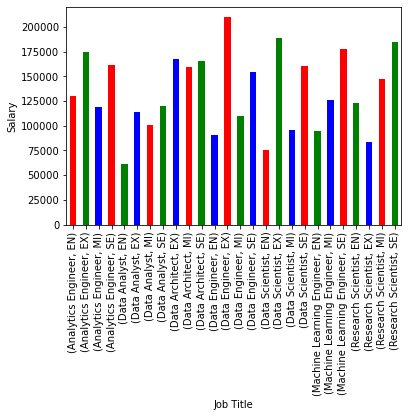

In [36]:
colors = ['red', 'green', 'blue']
grouped_salaries.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

### More work can be done here but we can do better with PowerBI

In [37]:
grouped_salaries.to_csv('average_salaries_by_experience.csv')